### Project introduction: Dataset info

For this project we'll be using a dataset from the botany domain, the Iris Plants Dataset. This dataset comes with the **_scikit-learn_** library, and contains information about different iris flowers, i.e. sepal length, sepal width, petal length, petal width and species (with three possible values for species: setosa, versicolor and virginica). 

This dataset contains measurements (i.e. sepal length, sepal width, petal length and petal width) for which we know the correct species. So if we go out in nature and find some iris flowers and measure their sepal length, sepal width, petal length and petal width, then we can use the iris dataset to predict which species each flower belongs to. 

So, to start the project we first need to tell Python that we're going to be using **_scikit-learn_**, with the use of the import command, and then import the dataset, assigning to **iris_dataset**.

In [1]:
import sklearn
import pandas as pd
from sklearn.datasets import load_iris

iris_dataset = load_iris()
#let's see get a sense of the data in the dataset

iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

We now that:

**feature_names** corresponds to the names of all the features in the dataset, in other words all the variables that we take into account when building our machine learning model. 

**target_names** corresponds to the class labels. There are three class labels: 'setosa', 'versicolor' and 'virginica'.

**data** contains the values for the different features, and **target** contains the species for each of the flowers in the database (contained in target_names).

With this we'll create a dataframe and name it **iris_df**

In [2]:
iris_df=pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

iris_df['target']=iris_dataset.target

#now, let's see how it looks

iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Processing the dataset

We'll now split the data in a test set, and a train set. This way we'll be able to measure its performance later on. To do this we'll need to import the _**train_test_split**_ function.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   iris_df.iloc[:, :-1], iris_dataset['target'], random_state=12)


print(y_train[:5])

#let's take a look at the training data
X_train.head()

[0 1 1 0 0]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
62,6.0,2.2,4.0,1.0
98,5.1,2.5,3.0,1.1
26,5.0,3.4,1.6,0.4
8,4.4,2.9,1.4,0.2


## Training and tweaking the model

Now that we have the data to train the model, we'll import the classifier and train it.

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=12)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12)

Now, let's evaluate it's performance to see if the model needs to be tweaked. (we want to avoid overfitting)

In [5]:
print("Accuracy on training set: ", tree_clf.score(X_train, y_train))
print("Accuracy on test set: ", tree_clf.score(X_test, y_test))

Accuracy on training set:  1.0
Accuracy on test set:  0.9473684210526315


We see that the model have an accuracy of 100%, which means that our decision tree is over-fitting the training data. To avoid that we are going to set the maximal depth of the tree to 3, and see if this helps the overall performance of the model.

In [6]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=12)
tree_clf.fit(X_train, y_train)

print("Accuracy on training set: ", tree_clf.score(X_train, y_train))
print("Accuracy on test set: ", tree_clf.score(X_test, y_test))

Accuracy on training set:  0.9732142857142857
Accuracy on test set:  0.9473684210526315


The new decision tree has lower accuracy on the training dataset, but it should have the same or even higher accuracy on other test datasets.

## Visualization

Finally, we will visualize de Decision Tree

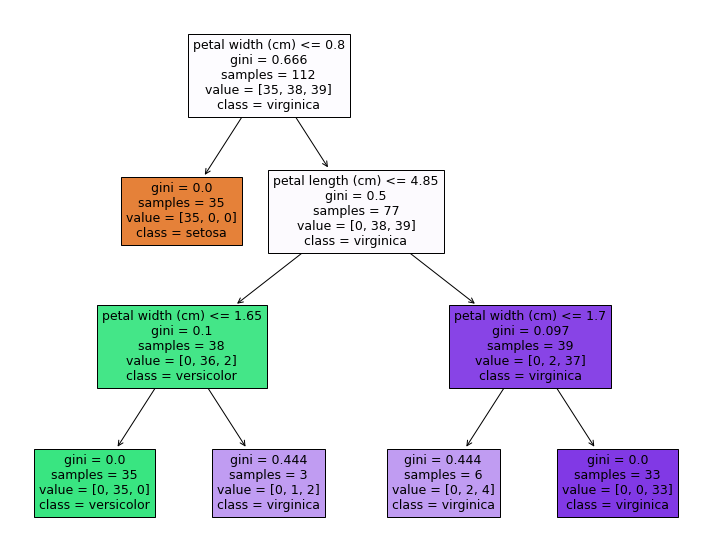

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(12.5,10))
_=tree.plot_tree(tree_clf, 
                   feature_names=iris_dataset.feature_names,  
                   class_names=iris_dataset.target_names,
                   filled=True)